/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


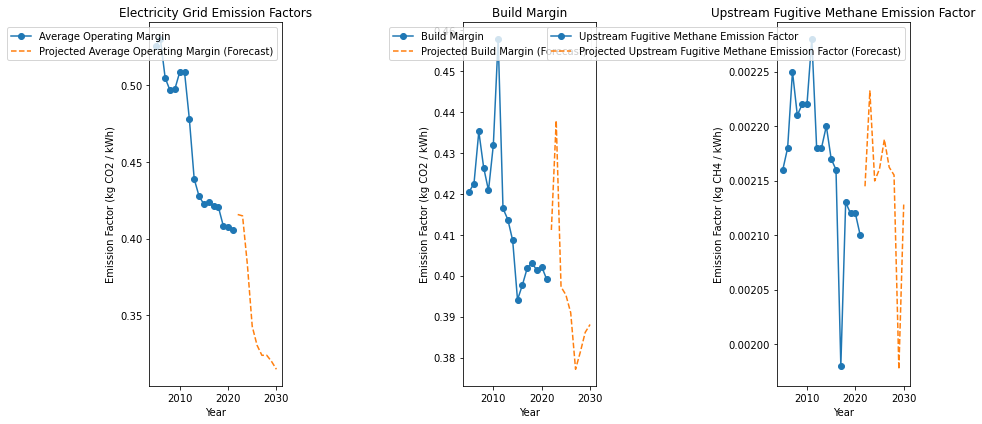

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data
years = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
emission_factors = np.array([
    [0.5255, 0.5300, 0.5046, 0.4965, 0.4973, 0.5083, 0.5085, 0.4778, 0.4388, 0.4277, 0.4224, 0.4237, 0.4210, 0.4206, 0.4085, 0.4074, 0.4057],
    [0.4205, 0.4225, 0.4352, 0.4264, 0.4208, 0.4319, 0.4578, 0.4164, 0.4137, 0.4086, 0.3941, 0.3977, 0.4018, 0.4031, 0.4013, 0.4022, 0.3992],
    [0.00216, 0.00218, 0.00225, 0.00221, 0.00222, 0.00222, 0.00228, 0.00218, 0.00218, 0.00220, 0.00217, 0.00216, 0.00198, 0.00213, 0.00212, 0.00212, 0.00210]
])

# Prepare training data
X = years.reshape(-1, 1)
Y = emission_factors.T

# Fit SARIMA models and forecast future values
future_years = np.arange(2022, 2031)
future_emission_factors = np.zeros((len(future_years), Y.shape[1]))

for i in range(Y.shape[1]):
    model = SARIMAX(Y[:, i], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    future_emission_factors[:, i] = model_fit.forecast(steps=len(future_years))

# Plotting
plt.figure(figsize=(12, 6))

# Electricity Grid Emission Factors
plt.subplot(1, 3, 1)
plt.plot(years, emission_factors[0], 'o-', label='Average Operating Margin')
plt.plot(future_years, future_emission_factors[:, 0], '--', label='Projected Average Operating Margin (Forecast)')
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CO2 / kWh)')
plt.title('Electricity Grid Emission Factors')
plt.legend()

# Build Margin
plt.subplot(1, 3, 2)
plt.plot(years, emission_factors[1], 'o-', label='Build Margin')
plt.plot(future_years, future_emission_factors[:, 1], '--', label='Projected Build Margin (Forecast)')
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CO2 / kWh)')
plt.title('Build Margin')
plt.legend()

# Upstream Fugitive Methane Emission Factor
plt.subplot(1, 3, 3)
plt.plot(years, emission_factors[2], 'o-', label='Upstream Fugitive Methane Emission Factor')
plt.plot(future_years, future_emission_factors[:, 2], '--', label='Projected Upstream Fugitive Methane Emission Factor (Forecast)')
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CH4 / kWh)')
plt.title('Upstream Fugitive Methane Emission Factor')
plt.legend()

plt.tight_layout()
plt.show()


/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


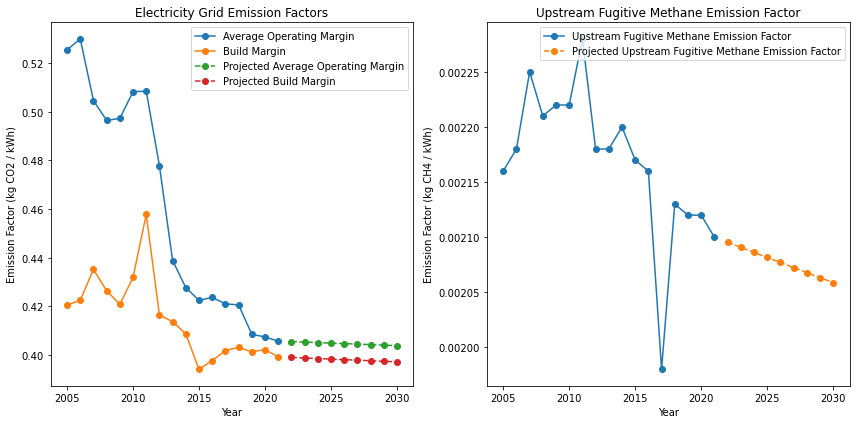

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data
years = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
emission_factors = np.array([
    [0.5255, 0.5300, 0.5046, 0.4965, 0.4973, 0.5083, 0.5085, 0.4778, 0.4388, 0.4277, 0.4224, 0.4237, 0.4210, 0.4206, 0.4085, 0.4074, 0.4057],
    [0.4205, 0.4225, 0.4352, 0.4264, 0.4208, 0.4319, 0.4578, 0.4164, 0.4137, 0.4086, 0.3941, 0.3977, 0.4018, 0.4031, 0.4013, 0.4022, 0.3992],
    [0.00216, 0.00218, 0.00225, 0.00221, 0.00222, 0.00222, 0.00228, 0.00218, 0.00218, 0.00220, 0.00217, 0.00216, 0.00198, 0.00213, 0.00212, 0.00212, 0.00210]
])

# Prepare training data
X = years.reshape(-1, 1)
Y = emission_factors.T

# Create SARIMAX models for each emission factor
models = []
for i in range(Y.shape[1]):
    model = SARIMAX(Y[:, i], order=(1, 0, 0))
    model_fit = model.fit(disp=False)
    models.append(model_fit)

# Project to 2030
future_years = np.arange(2022, 2031).reshape(-1, 1)
future_emission_factors = np.array([model.forecast(len(future_years)) for model in models]).T

# Plotting
plt.figure(figsize=(12, 6))

# Electricity Grid Emission Factors
plt.subplot(1, 2, 1)
plt.plot(years, emission_factors[0], 'o-', label='Average Operating Margin')
plt.plot(years, emission_factors[1], 'o-', label='Build Margin')
plt.plot(future_years.flatten(), future_emission_factors[:, 0], 'o--', label='Projected Average Operating Margin')
plt.plot(future_years.flatten(), future_emission_factors[:, 1], 'o--', label='Projected Build Margin')
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CO2 / kWh)')
plt.title('Electricity Grid Emission Factors')
plt.legend()

# Upstream Fugitive Methane Emission Factor
plt.subplot(1, 2, 2)
plt.plot(years, emission_factors[2], 'o-', label='Upstream Fugitive Methane Emission Factor')
plt.plot(future_years.flatten(), future_emission_factors[:, 2], 'o--', label='Projected Upstream Fugitive Methane Emission Factor')
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CH4 / kWh)')
plt.title('Upstream Fugitive Methane Emission Factor')
plt.legend()

plt.tight_layout()
plt.show()



/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/0f/m9b1_8zx31gbw9ht233tdpqc0000gn/T/ipykernel_21504/3520358313.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(years, emission_factors[0], 'o-', label='Average Operating Margin (Electricity Grid)', marker='o')
/var/folders/0f/m9b1_8zx31gbw9ht233tdpqc0000gn/T/ipykernel_21504/3520358313.py:34: UserWarning: 

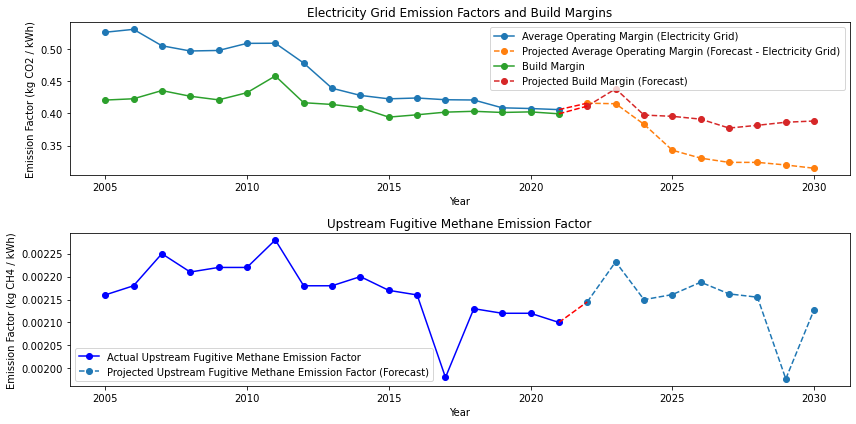

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data
years = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
emission_factors = np.array([
    [0.5255, 0.5300, 0.5046, 0.4965, 0.4973, 0.5083, 0.5085, 0.4778, 0.4388, 0.4277, 0.4224, 0.4237, 0.4210, 0.4206, 0.4085, 0.4074, 0.4057],
    [0.4205, 0.4225, 0.4352, 0.4264, 0.4208, 0.4319, 0.4578, 0.4164, 0.4137, 0.4086, 0.3941, 0.3977, 0.4018, 0.4031, 0.4013, 0.4022, 0.3992],
    [0.00216, 0.00218, 0.00225, 0.00221, 0.00222, 0.00222, 0.00228, 0.00218, 0.00218, 0.00220, 0.00217, 0.00216, 0.00198, 0.00213, 0.00212, 0.00212, 0.00210]
])

# Prepare training data
X = years.reshape(-1, 1)
Y = emission_factors.T

# Fit SARIMA models and forecast future values
future_years = np.arange(2022, 2031)
future_emission_factors = np.zeros((len(future_years), Y.shape[1]))

for i in range(Y.shape[1]):
    model = SARIMAX(Y[:, i], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    future_emission_factors[:, i] = model_fit.forecast(steps=len(future_years))

# Plotting
plt.figure(figsize=(12, 6))

# Combine Electricity Grid Emission Factors and Build Margins into one map
plt.subplot(2, 1, 1)
plt.plot(years, emission_factors[0], 'o-', label='Average Operating Margin (Electricity Grid)', marker='o')
plt.plot(future_years, future_emission_factors[:, 0], '--', label='Projected Average Operating Margin (Forecast - Electricity Grid)', marker='o')
plt.plot([years[-1], future_years[0]], [emission_factors[0][-1], future_emission_factors[0, 0]], 'r--')  # Connect actual and predicted lines
plt.plot(years, emission_factors[1], 'o-', label='Build Margin', marker='o')
plt.plot(future_years, future_emission_factors[:, 1], '--', label='Projected Build Margin (Forecast)', marker='o')
plt.plot([years[-1], future_years[0]], [emission_factors[1][-1], future_emission_factors[0, 1]], 'r--')  # Connect actual and predicted lines
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CO2 / kWh)')
plt.title('Electricity Grid Emission Factors and Build Margins')
plt.legend()

# Upstream Fugitive Methane Emission Factor
plt.subplot(2, 1, 2)
model = SARIMAX(Y[:, 2], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
future_emission_factor = model_fit.forecast(steps=len(future_years))
plt.plot(years, emission_factors[2], 'b-', label='Actual Upstream Fugitive Methane Emission Factor', marker='o')
plt.plot(future_years, future_emission_factor, '--', label='Projected Upstream Fugitive Methane Emission Factor (Forecast)', marker='o')
plt.plot([years[-1], future_years[0]], [emission_factors[2][-1], future_emission_factor[0]], 'r--')  # Connect actual and predicted lines
plt.xlabel('Year')
plt.ylabel('Emission Factor (kg CH4 / kWh)')
plt.title('Upstream Fugitive Methane Emission Factor')
plt.legend()

plt.tight_layout()
plt.show()
